<a href="https://colab.research.google.com/github/MatiasBlanco0/Trabajo-Practico-Netflix/blob/main/Trabajo_Practico_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importante

## Librerias

In [1]:
!pip install IMDbPY

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 29.7 MB/s 


In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imdb

Importamos `files` de `google.colab` para poder subir el archivo csv.

Importamos `pandas` para poder leer y modificar el archivo csv.

Importamos `matplotlib.pyplot` para poder hacer graficos.

Importamos `seaborn` para poder hacer un heatmap.

Importamos `imdb` para el bonus 2

## Subir Archivo CSV

In [3]:
uploaded = files.upload()

Saving NetflixHistory.csv to NetflixHistory.csv


## Leer y preparar el archivo CSV
Correr una vez por sesion

Guardamos el archivo csv en una variable llamada `df`por dataframe

In [4]:
df = pd.read_csv("/content/NetflixHistory.csv")

Filtrado de los dispositivos indicados.

In [5]:
devicesToIgnore = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']
for deviceToIgnore in devicesToIgnore:
  # inplace=True sirve para que la funcion sobreescriba el dataframe en vez de devolver una copia
  df.drop(df[df['Device Type'] == deviceToIgnore].index, inplace=True)

Filtrado de los trailers, hooks, recaps y los teaser_trailers

In [6]:
peliculasYSeries = df[pd.isna(df['Supplemental Video Type'])]

Conversion de la duracion a segundos

In [7]:
def convertTextToSeconds(string):
  if not isinstance(string, str):
    return string
  # El string de duration es del tipo 'hh:mm:ss'
  hours, minutes, seconds = string.split(":")
  return int(seconds) + (int(minutes) + int(hours) * 60) * 60

# Reemplazamos duration con la duracion en segundos
peliculasYSeries['Duration'] = peliculasYSeries['Duration'].apply(convertTextToSeconds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Conversion de start time a un timestamp

In [8]:
# Convertimos el string de start time a un timestamp
peliculasYSeries['Start Time'] = peliculasYSeries['Start Time'].apply(pd.Timestamp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Separado series y peliculas en distintos dataframes

In [9]:
series = peliculasYSeries[peliculasYSeries['Title'].str.split(":").apply(len) > 2]
peliculas = peliculasYSeries[peliculasYSeries['Title'].str.split(":").apply(len) < 3]

# Ejercicios

## A. Contabilizar el dispositivo con el que más títulos se reprodujeron.

Nosotros contamos como titulo al titulo unico, es decir, si se ve una pelicula dos veces, esto cuenta como una vez

In [10]:
devices = {}
# Iteramos por cada dispositivo del dataframe y si no esta lo agregamos con un valor
for device in df['Device Type']:
  if device not in devices:
    # Sacamos la cuenta de valores de la serie Title donde el Device Type es igual al del device actual, lo convertimos a un diccionario y sacamos las keys (los nombres de los titulos)
    # Al final devolvemos el largo para saber cuantos titulos se vieron en ese dispositivo
    devices[device] = len(df[df['Device Type'] == device]['Title'].value_counts().to_list())

# Utilizamos la funcion sorted para ordenar en base a los valores, accediendolos mediante devices.items() e indicando en el callback de key que los
# ordene en base al valor. Ademas de decir que los ordene de mayor a menor. Esto devuelve una lista de tuplas
devices = sorted(devices.items(), key=lambda item: item[1], reverse=True)

In [11]:
# Mostrar en consola
print("Dispositivo: " + devices[0][0])
print("Cantidad de titulos: " + str(devices[0][1]))

Dispositivo: Apple Apple TV 4 Apple TV
Cantidad de titulos: 1920


El dispositivo en el que mas titulos se reprodujeron fue: Apple Apple TV 4 Apple TV, con 1920 titulos

## B. Encontrar la película con más ocurrencias y la película con mayor duración total.


In [12]:
# peliculas['Title'].value_counts().to_dict() devuelve un diccionario con el titulo como key y la cantidad de ocurrencias como el valor
titulosPeliculas1 = peliculas['Title'].value_counts().to_dict()
titulosPeliculas2 = peliculas['Title'].value_counts().to_dict()

In [13]:
# La funcion sorted es igual que en el ejercicio A. Solo que convertimos a diccionario los primeros 3 items
print("Peliculas con mas ocurrencias: ")
for item in sorted(titulosPeliculas1.items(), key=lambda item: item[1], reverse=True)[:3]:
  print("Titulo: " + item[0])
  print("Cantidad de ocurrencias: " + str(item[1]))
  print()

Peliculas con mas ocurrencias: 
Titulo: Star Wars: El Imperio contraataca
Cantidad de ocurrencias: 7

Titulo: El código enigma
Cantidad de ocurrencias: 7

Titulo: ¿Qué pasó ayer?
Cantidad de ocurrencias: 6



In [14]:
# Por cada titulo unico sumamos la duracion de todas las ocurrencias
for titulo in titulosPeliculas2.keys():
  titulosPeliculas2[titulo] = sum(peliculas[peliculas['Title'] == titulo]['Duration'])

# La funcion sorted es igual que la anterior
print("Peliculas con mayor duracion total (en segundos): ")
for item in sorted(titulosPeliculas2.items(), key=lambda item: item[1], reverse=True)[:3]:
  print("Titulo: " + item[0])
  print("Segundos: " + str(item[1]))
  print()

Peliculas con mayor duracion total (en segundos): 
Titulo: Star Wars: El Imperio contraataca
Segundos: 29433

Titulo: Iron Man: El Hombre de Hierro
Segundos: 21718

Titulo: Star Wars: Una nueva esperanza
Segundos: 20394



Las peliculas con mas ocurrencias son Star Wars: El Imperio contraataca y El codigo enigma con 7 reproducciones.

La pelicula con mayor duracion total es Star Wars: El Imperio contraataca con 29433 segundos, es decir, 08:10:33

## C. Generar un TOP “N” de series vistas y graficar.
## 1.   Por tiempo visto
## 2.   Por ocurrencias

In [15]:
# series['Title'].value_counts().to_dict() devuelve un diccionario con el titulo como key y la cantidad de ocurrencias como el valor
titulosSeries1 = series['Title'].apply(lambda x: x.split(":")[0]).value_counts().to_dict()
titulosSeries2 = series['Title'].apply(lambda x: x.split(":")[0]).value_counts().to_dict()

Cuando cambies el numero de top correr el bloque que esta abajo

In [16]:
# Poner numero de top
top = 5

### Por tiempo visto

In [17]:
# Por cada titulo unico sumamos la duracion de todas las ocurrencias
for titulo in titulosSeries2.keys():
  titulosSeries2[titulo] = sum(series[series['Title'].str.contains(titulo)]['Duration'])

# La funcion sorted es igual que en el ejercicio A. Solo que convertimos a diccionario los primeros items en base al numero de top
datos1 = dict(sorted(titulosSeries2.items(), key=lambda item: item[1], reverse=True)[:top])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


Correr el bloque anterior una vez antes que este

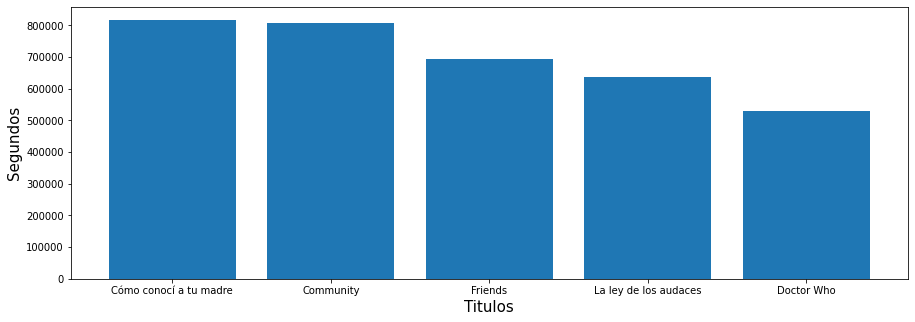

In [18]:
plt.figure(figsize=(15, 5))
plt.bar(datos1.keys(), datos1.values())
plt.xlabel("Titulos", fontsize=15)
plt.ylabel("Segundos", fontsize=15)
plt.show()

### Por ocurrencias

In [19]:
# La funcion sorted es igual que la anterior
datos2 = dict(sorted(titulosSeries1.items(), key=lambda item: item[1], reverse=True)[:top])

Correr el bloque anterior una vez antes que este

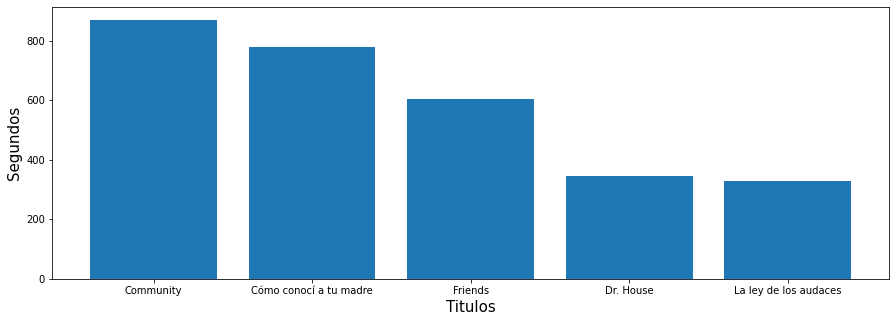

In [20]:
plt.figure(figsize=(15, 5))
plt.bar(datos2.keys(), datos2.values())
plt.xlabel("Titulos", fontsize=15)
plt.ylabel("Segundos", fontsize=15)
plt.show()

## D. Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.


In [21]:
# Creacion de una lista (7 elementos de largo) de listas (24 elementos de largo)
titulosPorDia = [[y for y in range(24)] for x in range(7)]
# Iteramos por cada dia y hora, dia es de 0 a 6 (Lunes a Sabado)
for dia in range(0,7):
  for hora in range(0,24):
    # Esto devuelve la cantidad de titulos que se vieron en el dia y hora indicado
    titulosPorDia[dia][hora] = sum(peliculasYSeries[(peliculasYSeries['Start Time'].dt.dayofweek == dia) & (peliculasYSeries['Start Time'].dt.hour == hora)]['Title'].value_counts().to_list())

Text(159.0, 0.5, 'Dias')

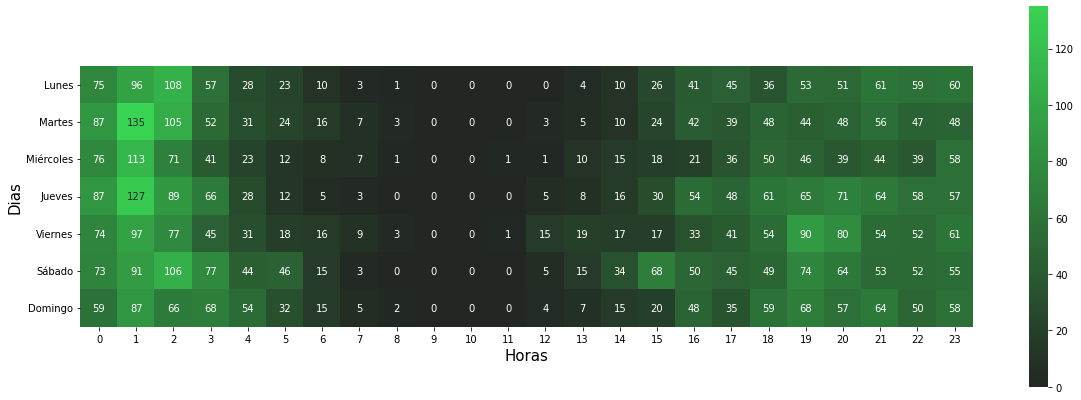

In [22]:
plt.figure(figsize=(20,7))
sns.heatmap(titulosPorDia, annot=True, fmt="d", square=True, yticklabels=["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], cmap=sns.color_palette("dark:#39d353", as_cmap=True))
plt.xlabel("Horas", fontsize=15)
plt.ylabel("Dias", fontsize=15)

## E. Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.


In [23]:
# De todos los tiempos de inicio accedemos el año
# Hacemos un value_counts (devuelve una serie con un valor y su cantidad de ocurrencias) y lo convertimos a un diccionario
años = dict(peliculasYSeries['Start Time'].dt.year.value_counts())

# Ordenamos los items del diccionario años en base a la key, es decir el año, y despues los convertimos a un diccionario
años = dict(sorted(años.items()))

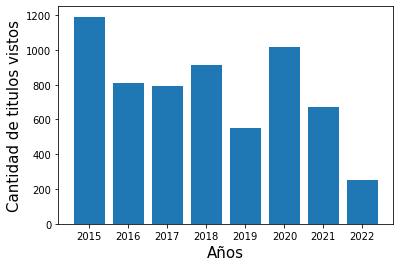

In [24]:
plt.bar(años.keys(), años.values())
plt.xlabel("Años", fontsize=15)
plt.ylabel("Cantidad de titulos vistos", fontsize=15)
plt.show()

## F. Total de días de todos los títulos reproducidos.


In [25]:
# peliculasYSeries['Title'].value_counts().to_dict() devuelve un diccionario con las keys como el titulo y la cantidad de ocurrencias como el valor
titulosGenerales = peliculasYSeries['Title'].value_counts().to_dict()

segundosTotales = 0

# Por cada titulo unico sumamos la duracion de todas las ocurrencias a segundosTotales
for titulo in titulosGenerales.keys():
  segundosTotales += sum(peliculasYSeries[peliculasYSeries['Title'] == titulo]['Duration'])

# convertimos los segundos totales a dias, horas, minutos y segundos
# 86400 = 3600 * 24
dias = segundosTotales/86400
horas = (dias - int(dias)) * 24
minutos = (horas - int(horas)) * 60
segundos = (minutos - int(minutos)) * 60

In [26]:
# Mostramos el tiempo total en el formato dd:hh:mm:ss
print("Tiempo total (en dd:hh:mm:ss): " + str(int(dias)) + ":" + str(int(horas)) + ":" + str(int(minutos)) + ":" + str(int(segundos)))

Tiempo total (en dd:hh:mm:ss): 99:18:11:41


# Bonus

## 1. Identificar cuál fue la película de Star Wars más veces vista por duración.

In [44]:
# Devuelve un diccionario con los titulos como keys y la cantidad de ocurrencias como valor, donde el titulo contiene "Star Wars"
peliculasStarWars = peliculas[peliculas['Title'].str.contains("Star Wars")]['Title'].value_counts().to_dict()
# Actualizacion del valor del diccionario a la suma total de la duracion de todas las veces que se vio
for key in peliculasStarWars:
  peliculasStarWars[key] = sum(peliculas[peliculas['Title'] == key]['Duration'])

In [45]:
# La funcion sorted es igual a la del ejercicio A
sorted(peliculasStarWars.items(), key=lambda item: item[1], reverse=True)

[('Star Wars: El Imperio contraataca', 29433),
 ('Star Wars: Una nueva esperanza', 20394),
 ('Star Wars: El regreso del Jedi', 9007),
 ('Star Wars: La venganza de los Sith', 8040),
 ('Star Wars: La amenaza fantasma', 7926),
 ('Star Wars: El despertar de la fuerza', 7142),
 ('Star Wars: El ataque de los clones', 6398),
 ('Empire of Dreams: The Story of the Star Wars Trilogy', 28)]

La pelicula que mas veces se vio es "Star Wars: El Imperio contraataca" con 08:10:33 (29433 segundos)

## 2. Utilizando la API de IMDb (u otra):

* ## Mostrar el póster de las películas más vistas, y de las series.

* ## Encontrar el género de series y el de películas más ocurrente.

## 3. Encontrar la serie que más rápido se terminó de ver.